In [23]:
from inverse_modelling_tfo.models import train_model, create_perceptron_model
from inverse_modelling_tfo.data import generate_data_loaders, normalize_zero_mean
from torch.optim import Adam, SGD
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from pandas import DataFrame
import pandas as pd

# Can We Fit All Datapoints at Once?

In [24]:
# Example Code
np.random.seed(70)  # Set seed for consistentcy
params = {
    'batch_size': 10000, 'shuffle': False, 'num_workers': 2
}

# Load Data
data = pd.read_pickle(r'/home/rraiyan/personal_projects/tfo_inverse_modelling/data/intensity/test_data.pkl')
data = normalize_zero_mean(data)

In [25]:
data.head()

,SDD,Intensity,Wave Int,Uterus Thickness,Maternal Wall Thickness,Maternal Mu_a,Fetal Mu_a
0,0.00,0.819658,0.5,0.25,-0.3,0.0,0.0
1,0.25,0.709747,0.5,0.25,-0.3,0.0,0.0
2,0.45,0.617316,0.5,0.25,-0.3,0.0,0.0
3,0.70,0.527734,0.5,0.25,-0.3,0.0,0.0
4,0.95,0.437506,0.5,0.25,-0.3,0.0,0.0


In [26]:
# MERGE Wave Ints
data = data.pivot_table(index=['Uterus Thickness', 'Maternal Wall Thickness', 'Maternal Mu_a', "Fetal Mu_a", 'Wave Int'], columns='SDD', values='Intensity').reset_index()

# Since we pivot on 2 columns, the dataframe now has multi-index. Which is essentially a Tuple. Making the tuple into a single word
# data.columns = [str(col[0]) + str(col[1]) for col in data.columns.values]

x_columns = ['Uterus Thickness', 'Maternal Wall Thickness', 'Maternal Mu_a', "Fetal Mu_a", 'Wave Int']
y_columns = list(data.columns)
for column_name in x_columns:
    y_columns.remove(column_name)

train, val = generate_data_loaders(data, params, x_columns, y_columns)

In [27]:
model = create_perceptron_model([5, 10, 20])
print(model)

Sequential(
  (0): Linear(in_features=5, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=20, bias=True)
  (3): Flatten(start_dim=1, end_dim=-1)
)


In [28]:
criterion = nn.MSELoss()
optimizer = Adam(model.parameters(), lr=0.005)
# optimizer = SGD(model.parameters(), lr=0.001, momentum=0.9)

In [29]:
train_loss, validation_loss = train_model(model, optimizer, criterion, train, val, epochs=50)

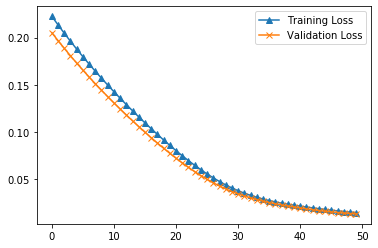

In [30]:
plt.figure()
plt.plot(train_loss, label='Training Loss', marker='^')
plt.plot(validation_loss, label='Validation Loss', marker='x')
plt.legend()